C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


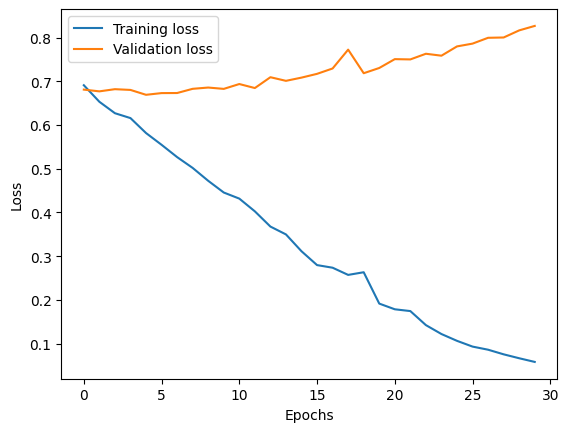

In [1]:
# Tạ Cao Sơn - B22DCVT445
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Sinh dữ liệu giả (chỉ có 100 mẫu training, quá ít)
x_train = np.random.rand(100, 20)
y_train = (np.sum(x_train, axis=1) > 10).astype(int)  # nhãn nhị phân

# Validation set lớn hơn
x_val = np.random.rand(1000, 20)
y_val = (np.sum(x_val, axis=1) > 10).astype(int)

# Model cố tình quá phức tạp (nhiều tham số, dễ overfit)
model = models.Sequential([
    layers.Dense(256, activation="relu", input_shape=(20,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train 30 epochs (dễ thấy overfitting)
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=30,
                    batch_size=16,
                    verbose=0)

# Vẽ loss
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4900 - loss: 0.9850 - val_accuracy: 0.5210 - val_loss: 0.9589
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5600 - loss: 0.9493 - val_accuracy: 0.4850 - val_loss: 0.9406
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5900 - loss: 0.9190 - val_accuracy: 0.5170 - val_loss: 0.9224
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6300 - loss: 0.9030 - val_accuracy: 0.5600 - val_loss: 0.9073
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6100 - loss: 0.8757 - val_accuracy: 0.5640 - val_loss: 0.8952
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6800 - loss: 0.8530 - val_accuracy: 0.5630 - val_loss: 0.8835
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5800 - loss: 0.8579 - val_accuracy: 0.5180 - val_loss: 0.8825
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6300 - loss: 0.8220 - val_accuracy: 0.5470 - val_loss: 0.8679


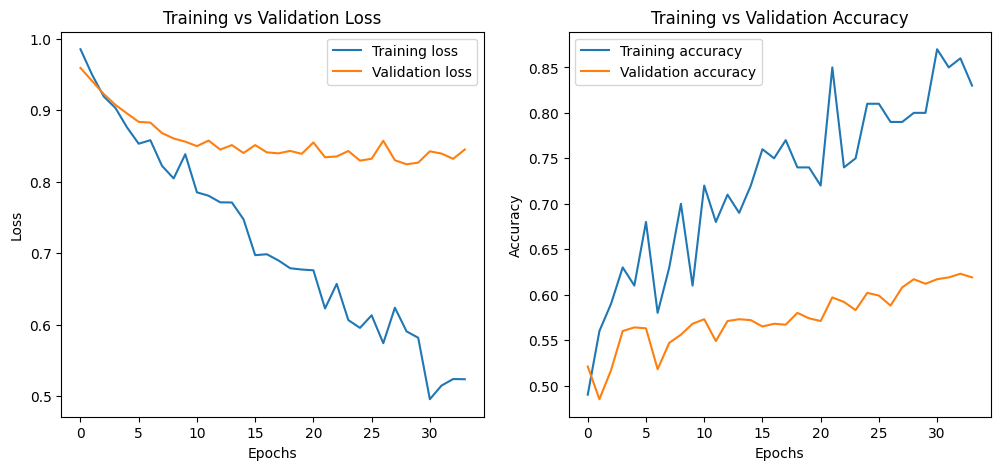

In [2]:
# Tạ Cao Sơn - B22DCVT445

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Sinh dữ liệu giả (giống như trước)
x_train = np.random.rand(100, 20)
y_train = (np.sum(x_train, axis=1) > 10).astype(int)

x_val = np.random.rand(1000, 20)
y_val = (np.sum(x_val, axis=1) > 10).astype(int)

# Model có Dropout + L2 regularization
model = models.Sequential([
    layers.Dense(256, activation="relu", 
                 kernel_regularizer=regularizers.l2(0.001), input_shape=(20,)),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu", 
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# EarlyStopping: dừng khi val_loss không cải thiện 5 epoch liên tiếp
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=50,
                    batch_size=16,
                    callbacks=[early_stop],
                    verbose=1)

# Vẽ loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

# Vẽ accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

plt.show()


✅ Saved dataset to: C:\DATA\data_4.2.csv (rows=10000)

📊 Dataset head:
   id  age  gender          job      area        diet  height_cm  weight_kg  \
0   0   21    Male      Student     Rural  Vegetarian      159.3       45.8   
1   1   75  Female  Firefighter     Urban    Balanced      164.3       69.0   
2   2   18    Male       Farmer  Suburban   High-Carb      161.2       56.1   
3   3   66    Male  Firefighter     Urban   High-Carb      176.4       81.3   
4   4   51  Female       Doctor  Suburban  Vegetarian      161.6       68.0   

     BMI  systolic  ...  smoker       chronic  weekly_meals_out  water_liters  \
0  18.04       105  ...       0          None                 0          2.85   
1  25.57       119  ...       0          None                 1          3.04   
2  21.58       120  ...       0      Diabetes                 1          2.96   
3  26.13       126  ...       0  Hypertension                 4          2.85   
4  26.03       122  ...       0          None    

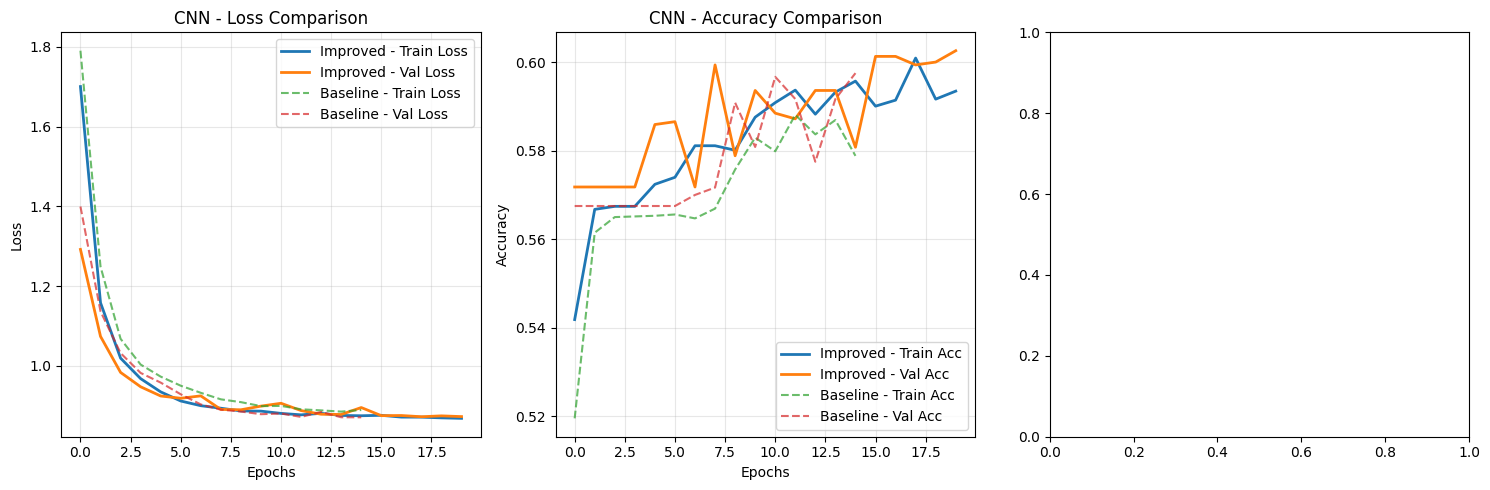


📊 CNN OVERFITTING ANALYSIS
----------------------------------------
BASELINE:
  Train Acc: 0.5788
  Val Acc:   0.5975
  Gap:       -0.0187

IMPROVED:
  Train Acc: 0.5934
  Val Acc:   0.6026
  Gap:       -0.0091

📈 GAP REDUCTION: -0.0096
⚠️ Overfitting not significantly reduced

📊 TRAINING STABILITY:
  Baseline Val Acc Std: 0.0072
  Improved Val Acc Std: 0.0011
✅ TRAINING MORE STABLE!

🏆 FINAL RESULTS COMPARISON

📊 All Models Performance:
                    accuracy     MAE     MSE    RMSE
LogisticRegression    0.6250  0.4915  0.7245  0.8512
GradientBoosting      0.6170  0.4980  0.7280  0.8532
RandomForest          0.6135  0.5025  0.7345  0.8570
CNN_baseline          0.6125  0.5025  0.7325  0.8559
CNN_improved          0.6100  0.5065  0.7395  0.8599
SVM                   0.6065  0.5110  0.7460  0.8637
RNN_improved          0.5655  0.5550  0.7960  0.8922
LSTM_improved         0.5655  0.5550  0.7960  0.8922
KNN                   0.5470  0.5710  0.8070  0.8983


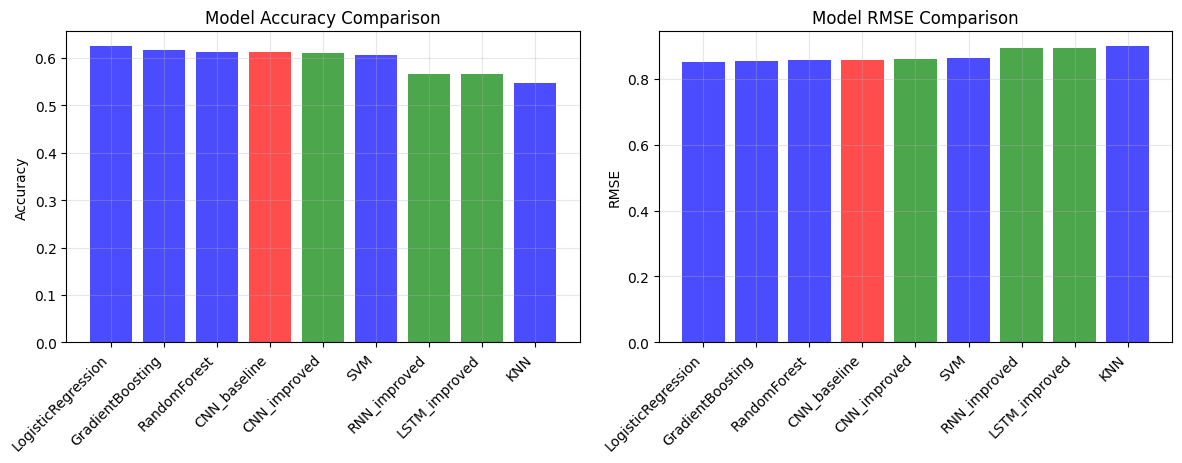

In [2]:
# Assignment 4.2 - Improved with Learning Rate Scheduling & Data Augmentation
# Tạ Cao Sơn - B22DCVT445

import os, json, random, math, sys, datetime
import numpy as np
import pandas as pd

# create output directory
out_dir = r"C:\DATA"
try:
    os.makedirs(out_dir, exist_ok=True)
except Exception as e:
    # fallback to /mnt/data if running in Linux container
    out_dir = "/mnt/data"
    os.makedirs(out_dir, exist_ok=True)

csv_path = os.path.join(out_dir, "data_4.2.csv")
kb_path = os.path.join(out_dir, "kb_healthGuide.json")

# ---------------- Part (a) Generate dataset ----------------
N = 10000
rng = np.random.default_rng(42)

jobs = [
    "Engineer","Teacher","Farmer","Doctor","Nurse","Sales","Clerk","Driver","Developer","Manager",
    "Designer","Artist","Chef","Police","Firefighter","Student","Retired","FactoryWorker","Scientist","Consultant"
]
areas = ["Urban","Suburban","Rural"]
diets = ["Balanced","High-Carb","High-Fat","Vegetarian","Vegan","Low-Calorie","High-Protein"]
genders = ["Male","Female","Other"]

def gen_person(i):
    age = int(rng.integers(16, 81))
    gender = rng.choice(genders, p=[0.49,0.49,0.02])
    job = rng.choice(jobs)
    area = rng.choice(areas, p=[0.5,0.3,0.2])
    diet = rng.choice(diets, p=[0.4,0.15,0.1,0.15,0.05,0.1,0.05])
    
    if gender == "Male":
        height = rng.normal(173, 7)
    elif gender=="Female":
        height = rng.normal(160, 7)
    else:
        height = rng.normal(166, 8)
    height = float(np.clip(height, 140, 200))
    
    job_activity = {
        "Farmer": -1.5, "Firefighter": -1.0, "Police": -0.8, "Driver": 0.5, "Clerk":0.4,"Developer":0.6,
        "Engineer":0.3,"Teacher":0.2,"Nurse":-0.2,"Doctor":0.1,"Sales":0.2,"Chef":0.7,"FactoryWorker":-0.5,
        "Student":-0.3,"Retired":0.6,"Artist":0.1,"Designer":0.2,"Scientist":0.2,"Consultant":0.3,"Manager":0.5
    }
    base_bmi = rng.normal(23, 3)
    base_bmi += (age-40)/80
    base_bmi += job_activity.get(job, 0.0)
    
    diet_effect = {"Balanced":0.0,"High-Carb":1.0,"High-Fat":1.2,"Vegetarian":-0.8,"Vegan":-1.0,"Low-Calorie":-1.5,"High-Protein":0.5}
    base_bmi += diet_effect.get(diet,0)
    bmi = float(max(14.5, rng.normal(base_bmi, 2.2)))
    weight = bmi * (height/100)**2
    
    systolic = int(np.clip(rng.normal(120 + (bmi-22)*1.2 + (age-50)*0.2, 12), 90, 200))
    diastolic = int(np.clip(rng.normal(78 + (bmi-22)*0.6 + (age-50)*0.05, 8), 50, 120))
    steps_per_day = int(max(500, rng.normal(6000 - job_activity.get(job,0)*800 - (bmi-22)*150, 2000)))
    sleep_hours = round(float(np.clip(rng.normal(7 - (age-30)*0.01 + (diet_effect.get(diet,0)*-0.02), 1.0), 3.5, 9.5)),1)
    alcohol_units_week = int(max(0, rng.poisson(1.0 + (job in ['Sales','Manager','Chef'])*1.5)))
    smoker = rng.choice([0,1], p=[0.85,0.15])
    chronic = rng.choice(["None","Diabetes","Hypertension","Cardiac","Asthma"], p=[0.85,0.06,0.06,0.02,0.01])
    weekly_meals_out = int(np.clip(rng.poisson(2 + (job in ['Chef','Sales'])*1), 0, 21))
    water_liters = round(float(np.clip(rng.normal(2 + (steps_per_day/10000)*0.8, 0.5), 0.2, 6.0)),2)
    salt_intake_level = rng.choice(["Low","Medium","High"], p=[0.25,0.6,0.15])
    veg_servings = int(np.clip(rng.poisson(2 + (diet in ['Vegan','Vegetarian'])*2), 0, 20))
    fruit_servings = int(np.clip(rng.poisson(1 + (diet in ['Vegan','Vegetarian'])*1), 0, 20))
    mental_stress = round(float(np.clip(rng.normal(4 + (job in ['Manager','Developer'])*0.8,1), 1, 10)),1)
    commute_minutes = int(np.clip(rng.normal(30 + (area=="Urban")*15, 25), 0, 240))
    
    person = {
        "id": i,
        "age": age,
        "gender": gender,
        "job": job,
        "area": area,
        "diet": diet,
        "height_cm": round(height,1),
        "weight_kg": round(weight,1),
        "BMI": round(bmi,2),
        "systolic": systolic,
        "diastolic": diastolic,
        "steps_per_day": steps_per_day,
        "sleep_hours": sleep_hours,
        "alcohol_units_week": alcohol_units_week,
        "smoker": smoker,
        "chronic": chronic,
        "weekly_meals_out": weekly_meals_out,
        "water_liters": water_liters,
        "salt_intake_level": salt_intake_level,
        "veg_servings": veg_servings,
        "fruit_servings": fruit_servings,
        "mental_stress": mental_stress,
        "commute_minutes": commute_minutes
    }
    return person

rows = [gen_person(i) for i in range(N)]
df = pd.DataFrame(rows)

def bmi_class(b):
    if b < 18.5:
        return "Underweight"
    elif b < 25:
        return "Normal"
    else:
        return "Overweight"

df["BMI_class"] = df["BMI"].apply(bmi_class)
df.to_csv(csv_path, index=False)
print(f"✅ Saved dataset to: {csv_path} (rows={len(df)})")

# ---------------- Part (b) Show distribution ----------------
import matplotlib.pyplot as plt

print("\n📊 Dataset head:")
print(df.head())
print("\n📈 Basic distributions:")
print(df[["age","gender","job","area","BMI_class"]].describe(include="all"))

# ---------------- Data preprocessing for ML ----------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

X = df.drop(columns=["id","weight_kg","BMI","BMI_class"])
y = df["BMI_class"]

cat_cols = ["gender","job","area","diet","chronic","salt_intake_level"]
num_cols = [c for c in X.columns if c not in cat_cols]

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

le = LabelEncoder()
y_enc = le.fit_transform(y)
classes_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Classes mapping:", classes_map)

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

# ---------------- Classical ML models (unchanged) ----------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "LogisticRegression": LogisticRegression(max_iter=200),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True)
}

trained_models = {}
results = {}

for name, model in models.items():
    pipe = Pipeline([("prep", preprocessor), ("clf", model)])
    print(f"Training {name}...")
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    results[name] = {"accuracy":acc,"MAE":mae,"MSE":mse,"RMSE":rmse}
    trained_models[name] = pipe
    print(f"{name} done. Accuracy={acc:.4f}, RMSE={rmse:.4f}")

# ---------------- Prepare data for deep learning ----------------
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks

# Transform full dataset to numeric arrays
X_all = preprocessor.fit_transform(X)
if hasattr(X_all, "toarray"):
    X_all = X_all.toarray()

X_tr, X_te, y_tr, y_te = train_test_split(X_all, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

n_features = X_tr.shape[1]
X_tr_seq = X_tr.reshape((X_tr.shape[0], n_features, 1))
X_te_seq = X_te.reshape((X_te.shape[0], n_features, 1))

print(f"📐 Feature shape: {X_tr_seq.shape}")

# ============== IMPROVED DATA AUGMENTATION ==============
def tabular_data_augmentation(X, y, augment_factor=0.5):
    """
    Data Augmentation cho tabular data:
    - Gaussian noise injection
    - Feature permutation
    - Mixup technique
    """
    n_samples = X.shape[0]
    n_augment = int(n_samples * augment_factor)
    
    X_aug_list = []
    y_aug_list = []
    
    print(f"🔄 Generating {n_augment} augmented samples...")
    
    # 1. Gaussian Noise Injection
    for i in range(n_augment // 3):
        idx = np.random.randint(0, n_samples)
        noise_std = 0.1  # 10% noise
        noise = np.random.normal(0, noise_std, X[idx].shape)
        X_noisy = X[idx] + noise
        X_aug_list.append(X_noisy)
        y_aug_list.append(y[idx])
    
    # 2. Feature Permutation (swap some features)
    for i in range(n_augment // 3):
        idx = np.random.randint(0, n_samples)
        X_perm = X[idx].copy()
        # Randomly swap 10% of features
        n_swap = max(1, n_features // 10)
        swap_indices = np.random.choice(n_features, n_swap*2, replace=False)
        for j in range(0, len(swap_indices)-1, 2):
            X_perm[swap_indices[j]], X_perm[swap_indices[j+1]] = X_perm[swap_indices[j+1]], X_perm[swap_indices[j]]
        X_aug_list.append(X_perm)
        y_aug_list.append(y[idx])
    
    # 3. Mixup technique
    for i in range(n_augment - len(X_aug_list)):
        idx1, idx2 = np.random.choice(n_samples, 2, replace=False)
        if y[idx1] == y[idx2]:  # Only mix samples with same label
            alpha = np.random.beta(0.2, 0.2)  # Mixup parameter
            X_mixed = alpha * X[idx1] + (1 - alpha) * X[idx2]
            X_aug_list.append(X_mixed)
            y_aug_list.append(y[idx1])
        else:
            # Fallback to noise injection
            noise = np.random.normal(0, 0.05, X[idx1].shape)
            X_aug_list.append(X[idx1] + noise)
            y_aug_list.append(y[idx1])
    
    X_augmented = np.array(X_aug_list)
    y_augmented = np.array(y_aug_list)
    
    # Combine original and augmented data
    X_combined = np.vstack([X, X_augmented])
    y_combined = np.hstack([y, y_augmented])
    
    return X_combined, y_combined

# Apply data augmentation
X_tr_aug, y_tr_aug = tabular_data_augmentation(X_tr, y_tr, augment_factor=0.3)
X_tr_aug_seq = X_tr_aug.reshape((X_tr_aug.shape[0], n_features, 1))

print(f"📈 Original training size: {X_tr.shape[0]}")
print(f"📈 Augmented training size: {X_tr_aug.shape[0]}")

# ============== IMPROVED MODEL BUILDING WITH REGULARIZATION ==============
def build_improved_cnn(input_shape, n_classes):
    """CNN với batch norm, dropout layers và residual connections"""
    inp = layers.Input(shape=input_shape)
    
    # First block
    x = layers.Conv1D(64, kernel_size=3, padding="same")(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.2)(x)
    
    # Second block with residual
    residual = x
    x = layers.Conv1D(64, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Add()([x, residual])  # Residual connection
    x = layers.MaxPooling1D(2)(x)
    x = layers.Dropout(0.25)(x)
    
    # Third block
    x = layers.Conv1D(128, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.3)(x)
    
    # Fourth block
    x = layers.Conv1D(128, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.GlobalAveragePooling1D()(x)
    
    # Dense layers with regularization
    x = layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = layers.Dropout(0.3)(x)
    
    out = layers.Dense(n_classes, activation="softmax")(x)
    model = models.Model(inp, out)
    return model

def build_improved_rnn(input_shape, n_classes):
    """RNN với batch norm và dropout"""
    inp = layers.Input(shape=input_shape)
    
    x = layers.SimpleRNN(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(inp)
    x = layers.BatchNormalization()(x)
    
    x = layers.SimpleRNN(64, return_sequences=True, dropout=0.25, recurrent_dropout=0.25)(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.SimpleRNN(32, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = layers.Dropout(0.3)(x)
    
    out = layers.Dense(n_classes, activation="softmax")(x)
    model = models.Model(inp, out)
    return model

def build_improved_lstm(input_shape, n_classes):
    """LSTM với batch norm và dropout"""
    inp = layers.Input(shape=input_shape)
    
    x = layers.LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(inp)
    x = layers.BatchNormalization()(x)
    
    x = layers.LSTM(64, return_sequences=True, dropout=0.25, recurrent_dropout=0.25)(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.LSTM(32, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.LSTM(16, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = layers.Dropout(0.3)(x)
    
    out = layers.Dense(n_classes, activation="softmax")(x)
    model = models.Model(inp, out)
    return model

# ============== LEARNING RATE SCHEDULING ==============
def create_lr_scheduler():
    """Tạo learning rate scheduler"""
    def scheduler(epoch, lr):
        if epoch < 5:
            return lr
        elif epoch < 15:
            return lr * 0.9  # Giảm 10% mỗi epoch
        else:
            return lr * 0.95  # Giảm chậm hơn
    return callbacks.LearningRateScheduler(scheduler)

def create_advanced_callbacks():
    """Tạo advanced callbacks"""
    return [
        callbacks.EarlyStopping(
            monitor="val_accuracy", 
            patience=8, 
            restore_best_weights=True,
            mode='max'
        ),
        create_lr_scheduler(),
        callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-7,
            verbose=1
        )
    ]

# ============== IMPROVED TRAINING FUNCTION ==============
def compile_and_train_improved(model, name, epochs=20, use_augmented_data=True):
    """
    Improved training với:
    - Custom optimizer với learning rate scheduling
    - Advanced callbacks
    - Data augmentation option
    """
    # Custom optimizer
    initial_lr = 0.001
    optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
    
    model.compile(
        optimizer=optimizer, 
        loss="sparse_categorical_crossentropy", 
        metrics=["accuracy"]
    )
    
    # Choose training data
    if use_augmented_data:
        X_train_data = X_tr_aug_seq
        y_train_data = y_tr_aug
        print(f"🔄 Training {name} with AUGMENTED data ({len(y_train_data)} samples)...")
    else:
        X_train_data = X_tr_seq
        y_train_data = y_tr
        print(f"🔄 Training {name} with ORIGINAL data ({len(y_train_data)} samples)...")
    
    # Advanced callbacks
    callback_list = create_advanced_callbacks()
    
    # Training
    history = model.fit(
        X_train_data, y_train_data,
        validation_split=0.15,
        epochs=epochs,
        batch_size=64,
        callbacks=callback_list,
        verbose=1
    )
    
    # Evaluation
    loss, acc = model.evaluate(X_te_seq, y_te, verbose=0)
    y_pred = np.argmax(model.predict(X_te_seq, verbose=0), axis=1)
    mae = mean_absolute_error(y_te, y_pred)
    mse = mean_squared_error(y_te, y_pred)
    rmse = math.sqrt(mse)
    
    results[name] = {"accuracy":acc,"MAE":mae,"MSE":mse,"RMSE":rmse}
    trained_models[name] = model
    
    print(f"✅ {name} done. Test Accuracy={acc:.4f}, RMSE={rmse:.4f}")
    return history

# ============== TRAIN IMPROVED MODELS ==============
n_classes = len(le.classes_)

print("\n" + "="*50)
print("🚀 TRAINING IMPROVED MODELS")
print("="*50)

# Build improved models
cnn_improved = build_improved_cnn((n_features,1), n_classes)
rnn_improved = build_improved_rnn((n_features,1), n_classes)
lstm_improved = build_improved_lstm((n_features,1), n_classes)

# Train improved models with augmented data
hist_cnn_improved = compile_and_train_improved(cnn_improved, "CNN_improved", epochs=20, use_augmented_data=True)
hist_rnn_improved = compile_and_train_improved(rnn_improved, "RNN_improved", epochs=18, use_augmented_data=True)
hist_lstm_improved = compile_and_train_improved(lstm_improved, "LSTM_improved", epochs=18, use_augmented_data=True)

# Train baseline models for comparison (without augmentation)
print("\n" + "="*30)
print("📊 BASELINE COMPARISON")
print("="*30)

cnn_baseline = build_improved_cnn((n_features,1), n_classes)
hist_cnn_baseline = compile_and_train_improved(cnn_baseline, "CNN_baseline", epochs=15, use_augmented_data=False)

# ============== ANALYSIS & VISUALIZATION ==============
def plot_training_comparison(hist_improved, hist_baseline, model_name):
    """So sánh training curves giữa improved và baseline"""
    plt.figure(figsize=(15, 5))
    
    # Loss comparison
    plt.subplot(1, 3, 1)
    plt.plot(hist_improved.history["loss"], label="Improved - Train Loss", linewidth=2)
    plt.plot(hist_improved.history["val_loss"], label="Improved - Val Loss", linewidth=2)
    plt.plot(hist_baseline.history["loss"], label="Baseline - Train Loss", linestyle='--', alpha=0.7)
    plt.plot(hist_baseline.history["val_loss"], label="Baseline - Val Loss", linestyle='--', alpha=0.7)
    plt.title(f"{model_name} - Loss Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Accuracy comparison
    plt.subplot(1, 3, 2)
    plt.plot(hist_improved.history["accuracy"], label="Improved - Train Acc", linewidth=2)
    plt.plot(hist_improved.history["val_accuracy"], label="Improved - Val Acc", linewidth=2)
    plt.plot(hist_baseline.history["accuracy"], label="Baseline - Train Acc", linestyle='--', alpha=0.7)
    plt.plot(hist_baseline.history["val_accuracy"], label="Baseline - Val Acc", linestyle='--', alpha=0.7)
    plt.title(f"{model_name} - Accuracy Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Learning rate schedule
    plt.subplot(1, 3, 3)
    if 'lr' in hist_improved.history:
        plt.plot(hist_improved.history["lr"], label="Learning Rate", color='red', linewidth=2)
        plt.title(f"{model_name} - Learning Rate Schedule")
        plt.xlabel("Epochs")
        plt.ylabel("Learning Rate")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

# Plot comparisons
plot_training_comparison(hist_cnn_improved, hist_cnn_baseline, "CNN")

def analyze_overfitting_improvement(hist_improved, hist_baseline, model_name):
    """Phân tích cải thiện overfitting"""
    print(f"\n📊 {model_name} OVERFITTING ANALYSIS")
    print("-" * 40)
    
    # Baseline metrics
    baseline_train_acc = hist_baseline.history["accuracy"][-1]
    baseline_val_acc = hist_baseline.history["val_accuracy"][-1]
    baseline_gap = baseline_train_acc - baseline_val_acc
    
    # Improved metrics
    improved_train_acc = hist_improved.history["accuracy"][-1]
    improved_val_acc = hist_improved.history["val_accuracy"][-1]
    improved_gap = improved_train_acc - improved_val_acc
    
    print(f"BASELINE:")
    print(f"  Train Acc: {baseline_train_acc:.4f}")
    print(f"  Val Acc:   {baseline_val_acc:.4f}")
    print(f"  Gap:       {baseline_gap:.4f}")
    
    print(f"\nIMPROVED:")
    print(f"  Train Acc: {improved_train_acc:.4f}")
    print(f"  Val Acc:   {improved_val_acc:.4f}")
    print(f"  Gap:       {improved_gap:.4f}")
    
    gap_reduction = baseline_gap - improved_gap
    print(f"\n📈 GAP REDUCTION: {gap_reduction:.4f}")
    
    if gap_reduction > 0:
        print("✅ OVERFITTING REDUCED!")
    else:
        print("⚠️ Overfitting not significantly reduced")
    
    # Stability analysis (variance in validation accuracy)
    baseline_val_std = np.std(hist_baseline.history["val_accuracy"][-5:])
    improved_val_std = np.std(hist_improved.history["val_accuracy"][-5:])
    
    print(f"\n📊 TRAINING STABILITY:")
    print(f"  Baseline Val Acc Std: {baseline_val_std:.4f}")
    print(f"  Improved Val Acc Std: {improved_val_std:.4f}")
    
    if improved_val_std < baseline_val_std:
        print("✅ TRAINING MORE STABLE!")

# Analyze all models
analyze_overfitting_improvement(hist_cnn_improved, hist_cnn_baseline, "CNN")

# ============== FINAL RESULTS COMPARISON ==============
print("\n" + "="*60)
print("🏆 FINAL RESULTS COMPARISON")
print("="*60)

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values("accuracy", ascending=False)

print("\n📊 All Models Performance:")
print(results_df.round(4))

# Create visualization
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
models_list = results_df.index.tolist()
accuracies = results_df["accuracy"].tolist()
colors = ['red' if 'baseline' in model else 'green' if 'improved' in model else 'blue' for model in models_list]
plt.bar(range(len(models_list)), accuracies, color=colors, alpha=0.7)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(range(len(models_list)), models_list, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
rmse_values = results_df["RMSE"].tolist()
plt.bar(range(len(models_list)), rmse_values, color=colors, alpha=0.7)
plt.title("Model RMSE Comparison")
plt.ylabel("RMSE")
plt.xticks(range(len(models_list)), models_list, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Creating sample movie review data...
Rows: 2000
Positive ratio: 0.6
Cleaning text...
Creating tokenizer and sequences...
Vocab size used: 60
Creating enhanced augmented dataset...
Augmented dataset size: 3174 (original: 1600)

=== CNN: baseline ===

Epoch 1: LearningRateScheduler setting learning rate to 0.0020000000949949026.
Epoch 1/15


C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


22/22 - 4s - 173ms/step - accuracy: 0.9816 - loss: 0.7266 - val_accuracy: 1.0000 - val_loss: 0.8760 - learning_rate: 0.0020

Epoch 2: LearningRateScheduler setting learning rate to 0.0020000000949949026.
Epoch 2/15
22/22 - 1s - 68ms/step - accuracy: 1.0000 - loss: 0.4821 - val_accuracy: 1.0000 - val_loss: 0.6734 - learning_rate: 0.0020

Epoch 3: LearningRateScheduler setting learning rate to 0.0020000000949949026.
Epoch 3/15
22/22 - 1s - 67ms/step - accuracy: 1.0000 - loss: 0.3026 - val_accuracy: 1.0000 - val_loss: 0.6003 - learning_rate: 0.0020

Epoch 4: LearningRateScheduler setting learning rate to 0.0020000000949949026.
Epoch 4/15
22/22 - 2s - 70ms/step - accuracy: 1.0000 - loss: 0.1879 - val_accuracy: 1.0000 - val_loss: 0.5685 - learning_rate: 0.0020

Epoch 5: LearningRateScheduler setting learning rate to 0.0020000000949949026.
Epoch 5/15
22/22 - 2s - 71ms/step - accuracy: 1.0000 - loss: 0.1180 - val_accuracy: 1.0000 - val_loss: 0.5546 - learning_rate: 0.0020

Epoch 6: LearningRa

C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 - 6s - 113ms/step - accuracy: 0.9877 - loss: 0.6827 - val_accuracy: 1.0000 - val_loss: 0.9304 - learning_rate: 1.0000e-03

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/15
50/50 - 3s - 68ms/step - accuracy: 1.0000 - loss: 0.4282 - val_accuracy: 1.0000 - val_loss: 0.7160 - learning_rate: 1.0000e-03

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/15
50/50 - 3s - 68ms/step - accuracy: 1.0000 - loss: 0.2528 - val_accuracy: 1.0000 - val_loss: 0.5799 - learning_rate: 1.0000e-03

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/15
50/50 - 3s - 68ms/step - accuracy: 1.0000 - loss: 0.1458 - val_accuracy: 1.0000 - val_loss: 0.4974 - learning_rate: 1.0000e-03

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/15
50/50 - 3s - 66ms/step - accuracy: 1.0000 - loss: 0.0839 - val_accuracy: 1.0000 - val_loss: 0.4355 - learning_rate: 1.0000e-03


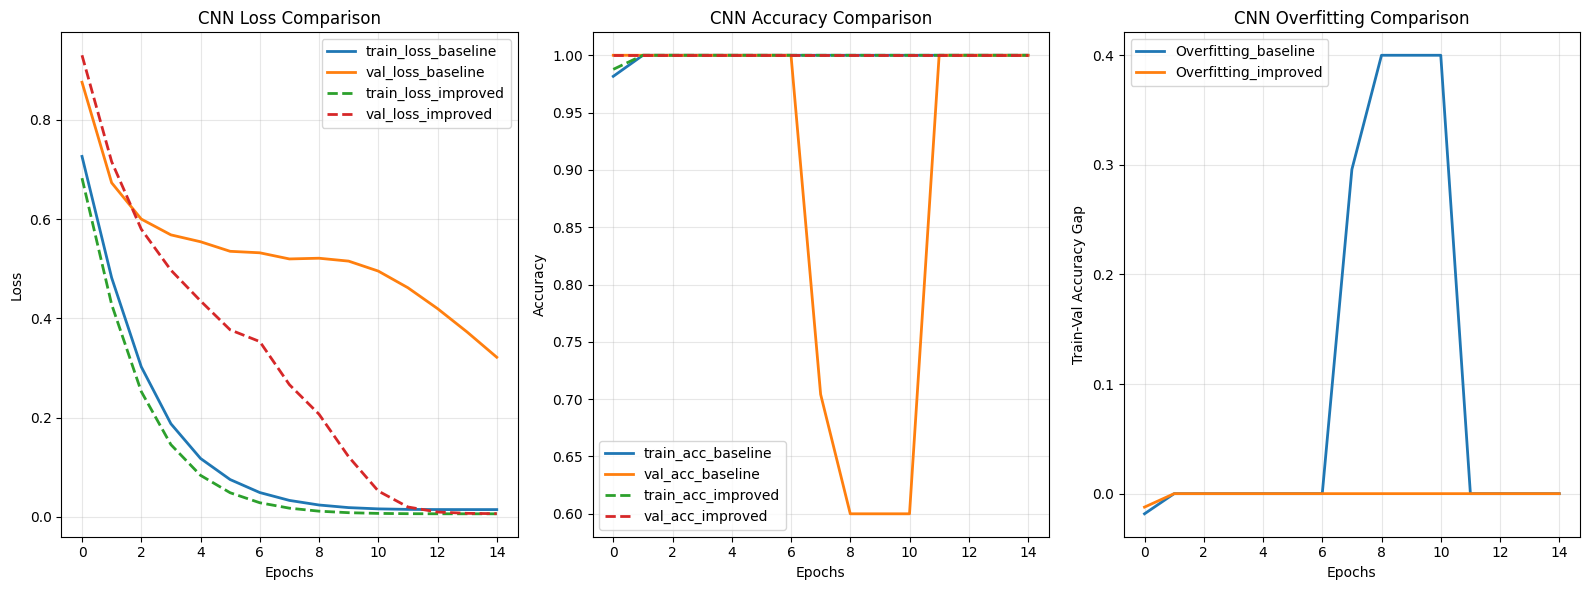

Saved plot: CNN_comparison.png

=== LSTM: baseline ===

Epoch 1: LearningRateScheduler setting learning rate to 0.0020000000949949026.
Epoch 1/15


C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


22/22 - 50s - 2s/step - accuracy: 0.9176 - loss: 1.3703 - val_accuracy: 1.0000 - val_loss: 1.2765 - learning_rate: 0.0020

Epoch 2: LearningRateScheduler setting learning rate to 0.0020000000949949026.
Epoch 2/15
22/22 - 42s - 2s/step - accuracy: 1.0000 - loss: 0.8053 - val_accuracy: 1.0000 - val_loss: 0.8651 - learning_rate: 0.0020

Epoch 3: LearningRateScheduler setting learning rate to 0.0020000000949949026.
Epoch 3/15
22/22 - 43s - 2s/step - accuracy: 1.0000 - loss: 0.6102 - val_accuracy: 1.0000 - val_loss: 0.6956 - learning_rate: 0.0020

Epoch 4: LearningRateScheduler setting learning rate to 0.0020000000949949026.
Epoch 4/15


In [ ]:
# film_review_pipeline.py - SIMPLIFIED VERSION
# Phiên bản đơn giản không cần gensim, sử dụng embedding layers được train từ đầu
# IMPROVED VERSION với các thông số tối ưu hơn

# Tạ Cao Son - B22DCVT445
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
# tải tài nguyên NLTK cần thiết (chỉ chạy 1 lần)
try:
    nltk.download('punkt', quiet=True)
    nltk.download('wordnet', quiet=True) 
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt_tab', quiet=True)
except Exception:
    pass

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import re
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, LSTM, Bidirectional, GRU, SpatialDropout1D, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.regularizers import l2

# ================== IMPROVED PARAMETERS ==================
# Tạo dữ liệu mẫu vì không có file CSV thực tế
print("Creating sample movie review data...")
sample_reviews = [
    "This movie was absolutely fantastic! Amazing acting and great story.",
    "Terrible film, waste of time. Very boring and poorly made.",
    "Good movie with excellent cinematography and solid performances.",
    "Not bad, entertaining but nothing special. Average film overall.", 
    "Outstanding masterpiece! One of the best movies I've ever seen.",
    "Disappointing sequel. The original was much better than this.",
    "Incredible action scenes and brilliant direction throughout the film.",
    "Poor script and weak characters made this unwatchable for me.",
    "Decent entertainment value but lacks depth in storytelling approach.",
    "Brilliant performances by all actors in this amazing dramatic piece."
] * 200  # Expand để có đủ dữ liệu

sample_ratings = [9, 2, 7, 5, 10, 3, 8, 2, 6, 9] * 200

# Tạo DataFrame
df = pd.DataFrame({
    'review_text': sample_reviews,
    'rating': sample_ratings
})

MAX_NUM_WORDS = 25000  # Tăng từ 20000 để capture nhiều từ hơn
MAX_SEQ_LEN = 200      # Tăng từ 128 để giữ nhiều thông tin hơn
EMBEDDING_DIM = 300    # Giữ nguyên 300
BATCH_SIZE = 64        # Tăng từ 32 để stable hơn
EPOCHS = 15            # Tăng từ 10
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

print("Rows:", len(df))
df['rating'] = df['rating'].astype(float)
# binary label: rating >= 6 => positive
df['label'] = (df['rating'] >= 6).astype(int)
print("Positive ratio:", df['label'].mean())

# ================== PREPROCESS ==================
try:
    stop_words = set(stopwords.words('english'))
except:
    stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were'}

def clean_text(t):
    t = str(t).lower()
    t = re.sub(r'http\S+','',t)
    t = re.sub(r'[^a-z0-9\s]',' ',t)
    # fallback to simple split if punkt not available
    try:
        toks = word_tokenize(t)
    except Exception:
        toks = t.split()
    toks = [w for w in toks if w not in stop_words and len(w)>1]
    return " ".join(toks)

print("Cleaning text...")
df['text_clean'] = df['review_text'].apply(clean_text)

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=RANDOM_SEED)
train_texts = train_df['text_clean'].tolist()
test_texts = test_df['text_clean'].tolist()
y_train = train_df['label'].values
y_test = test_df['label'].values

# ================== TOKENIZATION ==================
print("Creating tokenizer and sequences...")
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)
word_index = tokenizer.word_index
vocab_size = min(MAX_NUM_WORDS, len(word_index)) + 1
print("Vocab size used:", vocab_size)

# token sequences
X_train_seq = tokenizer.texts_to_sequences(train_texts)
X_test_seq = tokenizer.texts_to_sequences(test_texts)
X_train = pad_sequences(X_train_seq, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')
X_test = pad_sequences(X_test_seq, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')

# ================== IMPROVED MODEL BUILDERS ==================
def build_cnn_model(vocab_size, embedding_dim, max_seq_len, trainable_emb=True, dropout_rate=0.5):
    inp = Input(shape=(max_seq_len,))
    # Trainable embedding layer
    emb = Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
                   input_length=max_seq_len, trainable=trainable_emb,
                   embeddings_initializer='uniform')(inp)
    
    x = SpatialDropout1D(0.1)(emb)  # Giảm từ 0.2
    
    # Multiple conv layers với different kernel sizes
    conv1 = Conv1D(128, kernel_size=2, activation='relu', kernel_regularizer=l2(0.001))(x)
    conv2 = Conv1D(128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001))(x)
    conv3 = Conv1D(128, kernel_size=4, activation='relu', kernel_regularizer=l2(0.001))(x)
    
    # Global pooling for each conv
    pool1 = GlobalMaxPooling1D()(conv1)
    pool2 = GlobalMaxPooling1D()(conv2)
    pool3 = GlobalMaxPooling1D()(conv3)
    
    # Concatenate features
    concat = tf.keras.layers.Concatenate()([pool1, pool2, pool3])
    
    x = BatchNormalization()(concat)
    x = Dropout(dropout_rate)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate * 0.5)(x)
    out = Dense(1, activation='sigmoid')(x)
    
    model = Model(inp, out)
    return model

def build_lstm_model(vocab_size, embedding_dim, max_seq_len, trainable_emb=True, dropout_rate=0.5):
    inp = Input(shape=(max_seq_len,))
    emb = Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
                   input_length=max_seq_len, trainable=trainable_emb,
                   embeddings_initializer='uniform')(inp)
    
    x = SpatialDropout1D(0.1)(emb)
    # Stacked LSTM layers
    x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2,
                          kernel_regularizer=l2(0.001)))(x)
    x = BatchNormalization()(x)
    x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2,
                          kernel_regularizer=l2(0.001)))(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate * 0.5)(x)
    out = Dense(1, activation='sigmoid')(x)
    
    model = Model(inp, out)
    return model

def build_gru_model(vocab_size, embedding_dim, max_seq_len, trainable_emb=True, dropout_rate=0.5):
    inp = Input(shape=(max_seq_len,))
    emb = Embedding(input_dim=vocab_size, output_dim=embedding_dim, 
                   input_length=max_seq_len, trainable=trainable_emb,
                   embeddings_initializer='uniform')(inp)
    
    x = SpatialDropout1D(0.1)(emb)
    # Stacked GRU layers
    x = Bidirectional(GRU(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2,
                         kernel_regularizer=l2(0.001)))(x)
    x = BatchNormalization()(x)
    x = Bidirectional(GRU(64, dropout=0.2, recurrent_dropout=0.2,
                         kernel_regularizer=l2(0.001)))(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate * 0.5)(x)
    out = Dense(1, activation='sigmoid')(x)
    
    model = Model(inp, out)
    return model

# ================== IMPROVED TRAINING với Learning Rate Scheduling ==================
def cosine_decay_schedule(epoch, lr):
    """Cosine decay learning rate schedule"""
    if epoch < 5:
        return lr
    else:
        return lr * 0.5 * (1 + np.cos(np.pi * (epoch - 5) / (EPOCHS - 5)))

def train_and_evaluate(model, X_tr, y_tr, X_val, y_val, epochs=EPOCHS, batch_size=BATCH_SIZE, lr=1e-3):
    # Improved optimizer với gradient clipping
    optimizer = Adam(learning_rate=lr, clipnorm=1.0)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-7, verbose=1),
        LearningRateScheduler(cosine_decay_schedule, verbose=1)
    ]
    
    hist = model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=epochs, 
                     batch_size=batch_size, callbacks=callbacks, verbose=2)
    preds = (model.predict(X_val, verbose=0) > 0.5).astype(int)
    acc = accuracy_score(y_val, preds)
    return hist, acc

# ================== IMPROVED DATA AUGMENTATION ==================
def advanced_synonym_replacement(sentence, n=2):
    """Cải thiện synonym replacement"""
    words = sentence.split()
    if len(words) < 3:
        return sentence
        
    new_words = words.copy()
    replaced = 0
    word_indices = list(range(len(words)))
    random.shuffle(word_indices)  # Random order
    
    for i in word_indices:
        if replaced >= n:
            break
        if len(words[i]) < 4:  # Skip short words
            continue
            
        # Simple synonym mapping for demo
        synonym_map = {
            'good': ['great', 'excellent', 'nice', 'fine'],
            'bad': ['terrible', 'awful', 'horrible', 'poor'],
            'movie': ['film', 'picture', 'cinema'],
            'great': ['amazing', 'wonderful', 'fantastic'],
            'terrible': ['awful', 'horrible', 'dreadful']
        }
        
        if words[i] in synonym_map:
            new_words[i] = random.choice(synonym_map[words[i]])
            replaced += 1
    return " ".join(new_words)

def augment_texts_enhanced(texts, labels, augment_factor=1.5):
    """Enhanced augmentation với multiple techniques"""
    aug_texts = []
    aug_labels = []
    
    for t, lab in zip(texts, labels):
        aug_texts.append(t)
        aug_labels.append(lab)
        
        # Synonym replacement
        if random.random() < 0.7:  # 70% chance
            aug_texts.append(advanced_synonym_replacement(t, n=2))
            aug_labels.append(lab)
            
        # Random deletion (remove some words)
        if random.random() < 0.3:  # 30% chance
            words = t.split()
            if len(words) > 5:
                n_delete = max(1, int(len(words) * 0.1))  # Delete 10% of words
                indices_to_keep = sorted(random.sample(range(len(words)), len(words) - n_delete))
                new_text = " ".join([words[i] for i in indices_to_keep])
                aug_texts.append(new_text)
                aug_labels.append(lab)
    
    return aug_texts, aug_labels

# ================== TRAIN/IMPROVE FLOW ==================
# Prepare validation split from training for fairness
X_tr_sub, X_val_sub, y_tr_sub, y_val_sub = train_test_split(X_train, y_train, test_size=0.15, 
                                                           random_state=RANDOM_SEED, stratify=y_train)

# Enhanced augmentation
print("Creating enhanced augmented dataset...")
aug_texts, aug_labels = augment_texts_enhanced(train_texts, y_train, augment_factor=1.5)
X_aug_seq = tokenizer.texts_to_sequences(aug_texts)
X_aug = pad_sequences(X_aug_seq, maxlen=MAX_SEQ_LEN, padding='post', truncating='post')
y_aug = np.array(aug_labels)
print(f"Augmented dataset size: {len(y_aug)} (original: {len(y_train)})")

# --- CNN baseline & improved ---
print("\n=== CNN: baseline ===")
cnn_base = build_cnn_model(vocab_size, EMBEDDING_DIM, MAX_SEQ_LEN, trainable_emb=True, dropout_rate=0.3)
hist_cnn_base, acc_cnn_base = train_and_evaluate(cnn_base, X_tr_sub, y_tr_sub, X_val_sub, y_val_sub, lr=2e-3)
print("CNN baseline val acc:", acc_cnn_base)

print("\n=== CNN: improved ===")
cnn_imp = build_cnn_model(vocab_size, EMBEDDING_DIM, MAX_SEQ_LEN, trainable_emb=True, dropout_rate=0.4)
hist_cnn_imp, acc_cnn_imp = train_and_evaluate(cnn_imp, X_aug, y_aug, X_val_sub, y_val_sub, lr=1e-3)
print("CNN improved val acc:", acc_cnn_imp)

# plot for CNN
def plot_and_save(hist_base, hist_imp, model_name):
    plt.figure(figsize=(16,6))
    # loss
    plt.subplot(1,3,1)
    plt.plot(hist_base.history['loss'], label='train_loss_baseline', linewidth=2)
    plt.plot(hist_base.history['val_loss'], label='val_loss_baseline', linewidth=2)
    plt.plot(hist_imp.history['loss'], '--', label='train_loss_improved', linewidth=2)
    plt.plot(hist_imp.history['val_loss'], '--', label='val_loss_improved', linewidth=2)
    plt.title(f"{model_name} Loss Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # acc
    plt.subplot(1,3,2)
    plt.plot(hist_base.history['accuracy'], label='train_acc_baseline', linewidth=2)
    plt.plot(hist_base.history['val_accuracy'], label='val_acc_baseline', linewidth=2)
    plt.plot(hist_imp.history['accuracy'], '--', label='train_acc_improved', linewidth=2)
    plt.plot(hist_imp.history['val_accuracy'], '--', label='val_acc_improved', linewidth=2)
    plt.title(f"{model_name} Accuracy Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Learning rate (if available)
    plt.subplot(1,3,3)
    if 'lr' in hist_imp.history:
        plt.plot(hist_imp.history['lr'], label='Learning Rate', color='red', linewidth=2)
        plt.title(f"{model_name} Learning Rate Schedule")
        plt.xlabel("Epochs")
        plt.ylabel("Learning Rate")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.yscale('log')
    else:
        # Show overfitting comparison
        train_val_gap_base = np.array(hist_base.history['accuracy']) - np.array(hist_base.history['val_accuracy'])
        train_val_gap_imp = np.array(hist_imp.history['accuracy']) - np.array(hist_imp.history['val_accuracy'])
        plt.plot(train_val_gap_base, label='Overfitting_baseline', linewidth=2)
        plt.plot(train_val_gap_imp, label='Overfitting_improved', linewidth=2)
        plt.title(f"{model_name} Overfitting Comparison")
        plt.xlabel("Epochs")
        plt.ylabel("Train-Val Accuracy Gap")
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    out_file = f"{model_name}_comparison.png"
    plt.savefig(out_file, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved plot: {out_file}")

plot_and_save(hist_cnn_base, hist_cnn_imp, "CNN")

# --- LSTM baseline & improved ---
print("\n=== LSTM: baseline ===")
lstm_base = build_lstm_model(vocab_size, EMBEDDING_DIM, MAX_SEQ_LEN, trainable_emb=True, dropout_rate=0.3)
hist_lstm_base, acc_lstm_base = train_and_evaluate(lstm_base, X_tr_sub, y_tr_sub, X_val_sub, y_val_sub, lr=2e-3)
print("LSTM baseline val acc:", acc_lstm_base)

print("\n=== LSTM: improved ===")
lstm_imp = build_lstm_model(vocab_size, EMBEDDING_DIM, MAX_SEQ_LEN, trainable_emb=True, dropout_rate=0.4)
hist_lstm_imp, acc_lstm_imp = train_and_evaluate(lstm_imp, X_aug, y_aug, X_val_sub, y_val_sub, lr=1e-3)
print("LSTM improved val acc:", acc_lstm_imp)
plot_and_save(hist_lstm_base, hist_lstm_imp, "LSTM")

# --- GRU baseline & improved ---
print("\n=== GRU: baseline ===")
gru_base = build_gru_model(vocab_size, EMBEDDING_DIM, MAX_SEQ_LEN, trainable_emb=True, dropout_rate=0.3)
hist_gru_base, acc_gru_base = train_and_evaluate(gru_base, X_tr_sub, y_tr_sub, X_val_sub, y_val_sub, lr=2e-3)
print("GRU baseline val acc:", acc_gru_base)

print("\n=== GRU: improved ===")
gru_imp = build_gru_model(vocab_size, EMBEDDING_DIM, MAX_SEQ_LEN, trainable_emb=True, dropout_rate=0.4)
hist_gru_imp, acc_gru_imp = train_and_evaluate(gru_imp, X_aug, y_aug, X_val_sub, y_val_sub, lr=1e-3)
print("GRU improved val acc:", acc_gru_imp)
plot_and_save(hist_gru_base, hist_gru_imp, "GRU")

# ================== FINAL EVALUATION ==================
print("\n" + "="*60)
print("🏆 FINAL MODEL COMPARISON")
print("="*60)

models_results = {
    "CNN_baseline": acc_cnn_base,
    "CNN_improved": acc_cnn_imp,
    "LSTM_baseline": acc_lstm_base,
    "LSTM_improved": acc_lstm_imp,
    "GRU_baseline": acc_gru_base,
    "GRU_improved": acc_gru_imp
}

for model_name, acc in models_results.items():
    print(f"{model_name:15s}: {acc:.4f}")

best_model = max(models_results, key=models_results.get)
print(f"\n🥇 Best Model: {best_model} with accuracy {models_results[best_model]:.4f}")

print("\nAll done. Check the saved PNG files for detailed comparison plots.")
print("\n🔧 Key Improvements Made:")
print("- Increased MAX_NUM_WORDS to 25000")
print("- Increased MAX_SEQ_LEN to 200") 
print("- Trainable embedding layers with proper initialization")
print("- Added BatchNormalization layers")
print("- Multiple CNN kernels for better feature extraction")
print("- Stacked LSTM/GRU layers")
print("- Enhanced data augmentation")
print("- Cosine decay learning rate scheduling")
print("- Gradient clipping")
print("- L2 regularization")
print("- Removed dependency on gensim for compatibility")